# 第3回課題
matplotlib

今回は [pyplot](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) の tutorial に従えば問題ないようになっています．

他のライブラリとしては，seaborn が有名だと思います．

In [1]:
import matplotlib.pyplot as plt
# plt.show の省略
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# 日本語化はフォントへの path を通せばいいのですが，今回は library の力を借りましょう
#!pip install japanize_matplotlib

In [4]:
# 既に日本語化できている場合は，コメントアウト
import japanize_matplotlib # https://github.com/uehara1414/japanize-matplotlib
'''
# 中身
import os
import pathlib

import matplotlib
from matplotlib import font_manager

FONTS_DIR = 'fonts'
FONT_NAME = "IPAexGothic"

font_dir_path = pathlib.Path(os.path.abspath(__file__)).parent / pathlib.Path(FONTS_DIR)
font_dirs = [font_dir_path, ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

matplotlib.rc('font', family=FONT_NAME)
'''

'\n# 中身\nimport os\nimport pathlib\n\nimport matplotlib\nfrom matplotlib import font_manager\n\nFONTS_DIR = \'fonts\'\nFONT_NAME = "IPAexGothic"\n\nfont_dir_path = pathlib.Path(os.path.abspath(__file__)).parent / pathlib.Path(FONTS_DIR)\nfont_dirs = [font_dir_path, ]\nfont_files = font_manager.findSystemFonts(fontpaths=font_dirs)\nfont_list = font_manager.createFontList(font_files)\nfont_manager.fontManager.ttflist.extend(font_list)\n\nmatplotlib.rc(\'font\', family=FONT_NAME)\n'

In [5]:
# iris dataset の読み込み（第2回課題のネタバレ）
from sklearn.datasets import load_iris
iris_data = load_iris() #del iris_data などで不要となった変数を消すことも可能
data, label, feature_names = iris_data["data"], iris_data["target"], iris_data["feature_names"]
iris_df = pd.DataFrame(data, columns=feature_names)
label = pd.DataFrame(label, columns=["label"])
iris_df = pd.concat([iris_df, label], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## hist

### 課題1
sepal length (cm) について，histogram を作る（bins をいじるなどしてよい）．
```
plt.hist
```

(array([ 0.,  0.,  0.,  1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,
         1.,  6.,  7.,  6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,
         2., 11.,  0.,  4.,  1.,  1.,  4.,  0.,  1.,  0.,  1.,  4.,  0.,
         1.]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
        6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
        7.9, 8. ]),
 <a list of 40 Patch objects>)

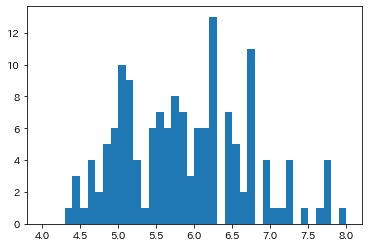

In [20]:
plt.hist(iris_df[iris_df.columns[0]],range=(4,8),bins=40)

### 課題2
課題1の graph に label を付け，判例を付与．さらに，title を fontsize 18 で追加（できれば xlabel, ylabel もやってほしいが）．
```
#plt.figure
plt.hist
#plt.xlabel
#plt.ylabel
plt.title
plt.legend
```

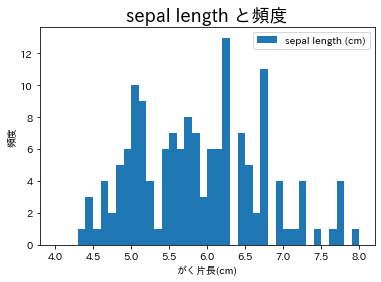

In [26]:
plt.hist(iris_df[iris_df.columns[0]],range=(4,8),bins=40,label=iris_df.columns[0])
plt.title("sepal length と頻度",fontsize=18)
plt.xlabel("がく片長(cm)")
plt.ylabel("頻度")
plt.legend()

### 発展課題１
fontsize を backend([rcParams](https://matplotlib.org/3.2.1/api/matplotlib_configuration_api.html#matplotlib.RcParams))で設定
```
plt.rcParams
#plt.figure
plt.hist
#plt.xlabel
#plt.ylabel
plt.title
plt.legend
```

### 発展課題2
1行2列で可視化しよう（subplot の使用）
```
plt.rcParams
#plt.figure
plt.hist
#plt.xlabel
#plt.ylabel
plt.title
plt.legend
```

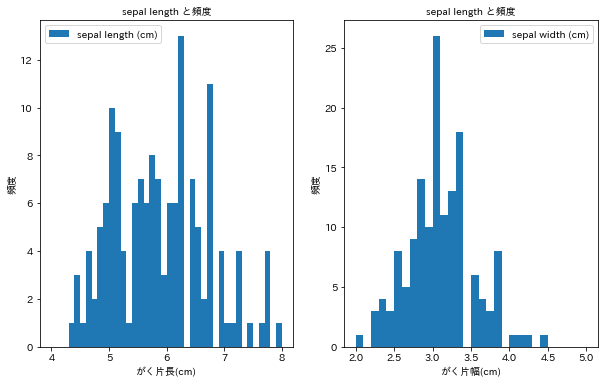

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(iris_df[iris_df.columns[0]],range=(4,8),bins=40,label=iris_df.columns[0])
plt.title("sepal length と頻度",fontsize=10)
plt.xlabel("がく片長(cm)")
plt.ylabel("頻度")
plt.legend()

plt.subplot(1,2,2)
plt.hist(iris_df[iris_df.columns[1]],range=(2,5),bins=30,label=iris_df.columns[1])
plt.title("sepal length と頻度",fontsize=10)
plt.xlabel("がく片幅(cm)")
plt.ylabel("頻度")
plt.legend()

## scatter

### 課題3
scatter を用いて，横を sepal width，縦を sepal length とする点を表示
```
plt.scatter
```

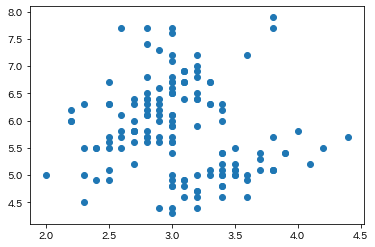

In [38]:
plt.scatter(iris_df[iris_df.columns[1]],iris_df[iris_df.columns[0]])

### 課題4
課題3の図に，横を petal width，縦を petal length とする緑色の点を追加で表示
```
plt.scatter
plt.scatter
```

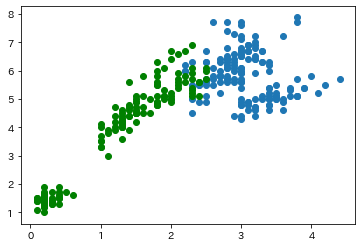

In [39]:
plt.scatter(iris_df[iris_df.columns[1]],iris_df[iris_df.columns[0]])
plt.scatter(iris_df[iris_df.columns[3]],iris_df[iris_df.columns[2]],color="green")

## plot
`y = x**2` の直線を plot

```[python]
x = np.linspace(0, 100, 10**5)
plt.
```

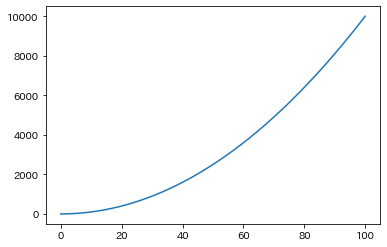

In [41]:
x = np.linspace(0, 100, 10**5)
plt.plot(x,x**2)